### Exploring bioRad data

In [1]:
library(bioRad, quietly = T)
library(Hmisc, quietly = T)
HOME = '/gws_gpfs/projects/project-urban_birds/workspace' # this is unique
file.exists(HOME)
setwd(HOME)

Welcome to bioRad version 0.5.0



To enable Docker functionality, start Docker and run 'check_docker()'
in R


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




[1] TRUE

In [2]:
load("./share/data/KBGM2015/KBGM2015.RData")
# set session time zone to UTC
Sys.setenv(TZ = "UTC")

### Check the data to see what is the class

In [3]:
# data are stored in a vpts (vertical profile time series) object:
data

                   Irregular time series of vertical profiles (class vpts)

           radar:  KBGM 
      # profiles:  4722 
time range (UTC):  2015-03-01 22:41:40 - 2015-11-15 11:37:27 
   time step (s):  min: 580     max:  4115471 

In [4]:
data$attributes

$where
  interval levels      lat       lon height
1      100     30 42.19972 -75.98472    519

$what
                   source
1 KBGM20150301_224140.csv

$how
  wavelength        task
1       10.6 UMASS Cajun

In [5]:
describe(data$height)

data$height 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      30        0       30        1     1969     1033      664      809 
     .25      .50      .75      .90      .95 
    1244     1969     2694     3129     3274 

lowest :  519  619  719  819  919, highest: 3019 3119 3219 3319 3419

Airplane fly at ~30K to 38K feet so these measurements are in meter?

### Get only the night time data

In [6]:
index_night <- check_night(data)
data_night <- data[index_night]

Warning message in plot.vpts(data_night):
“Irregular time-series: missing profiles will not be visible.Use 'regularize_vpts' to make time series regular.”


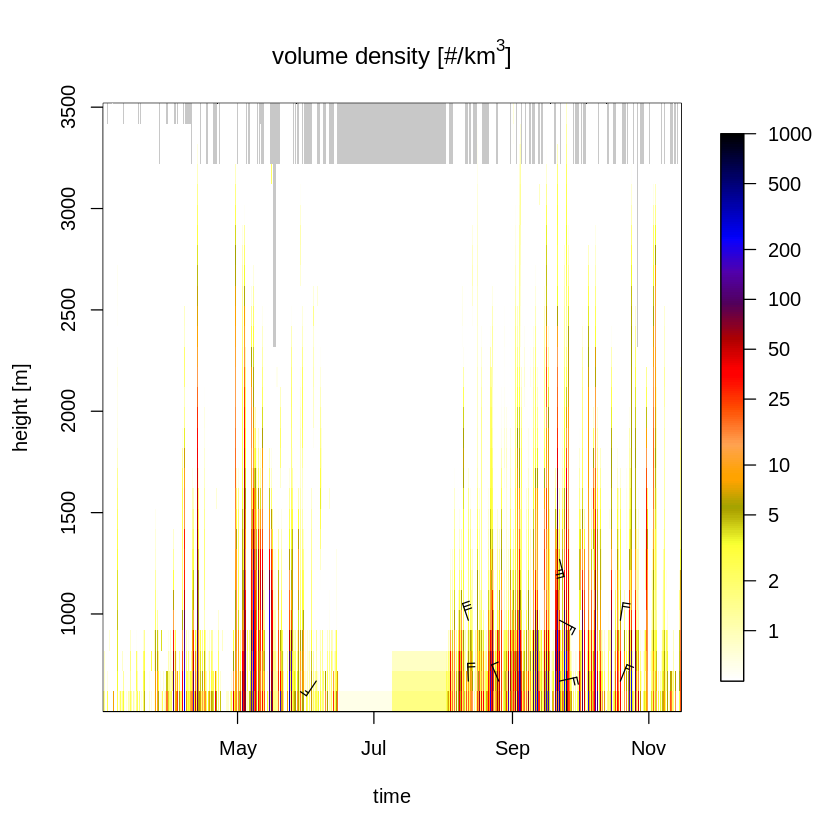

In [7]:
plot(data_night)

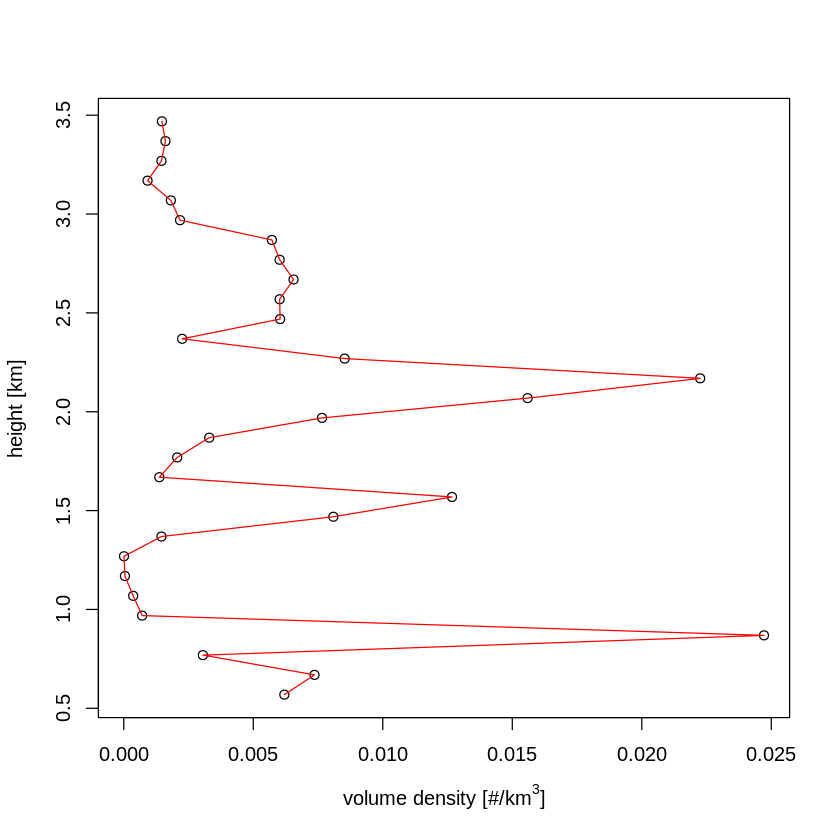

In [8]:
# let'splot the vertical profile, in terms of bird density
plot(data_night[15], quantity = "dens")

In [9]:
data_night[15]

               Vertical profile (class vp)

       radar:  KBGM 
      source:  KBGM20150301_224140.csv 
nominal time:  2015-03-02 06:12:04 
generated by:  UMASS Cajun  

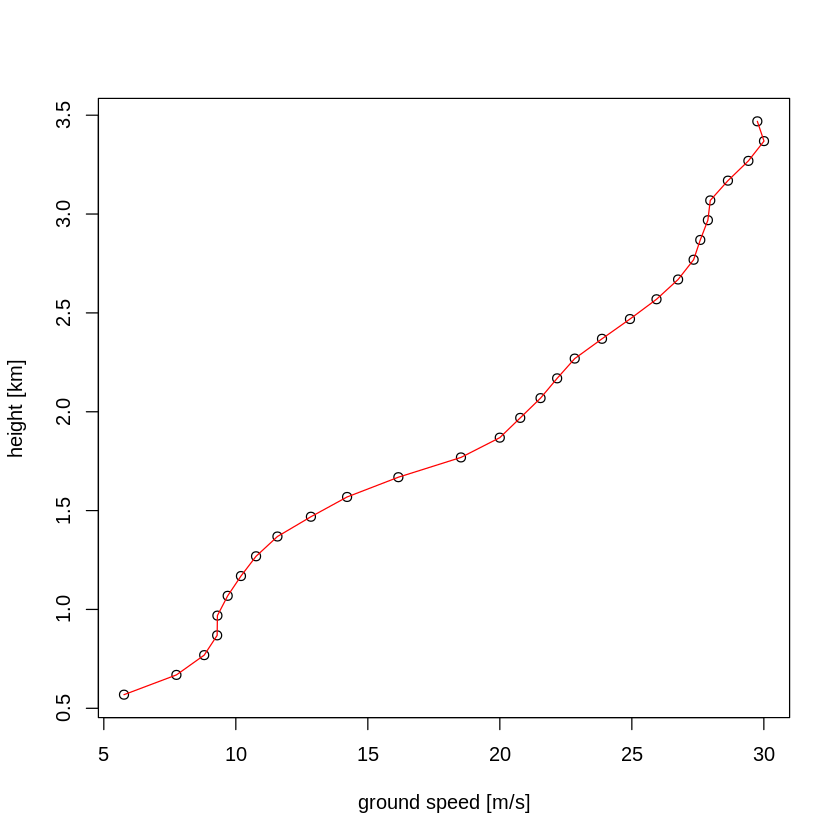

In [10]:
# This is the vertical profile of ground speed
plot(data_night[15], quantity = "ff") 

Warning message in plot.vpts(data_night, quantity = "dbz"):
“Irregular time-series: missing profiles will not be visible.Use 'regularize_vpts' to make time series regular.”


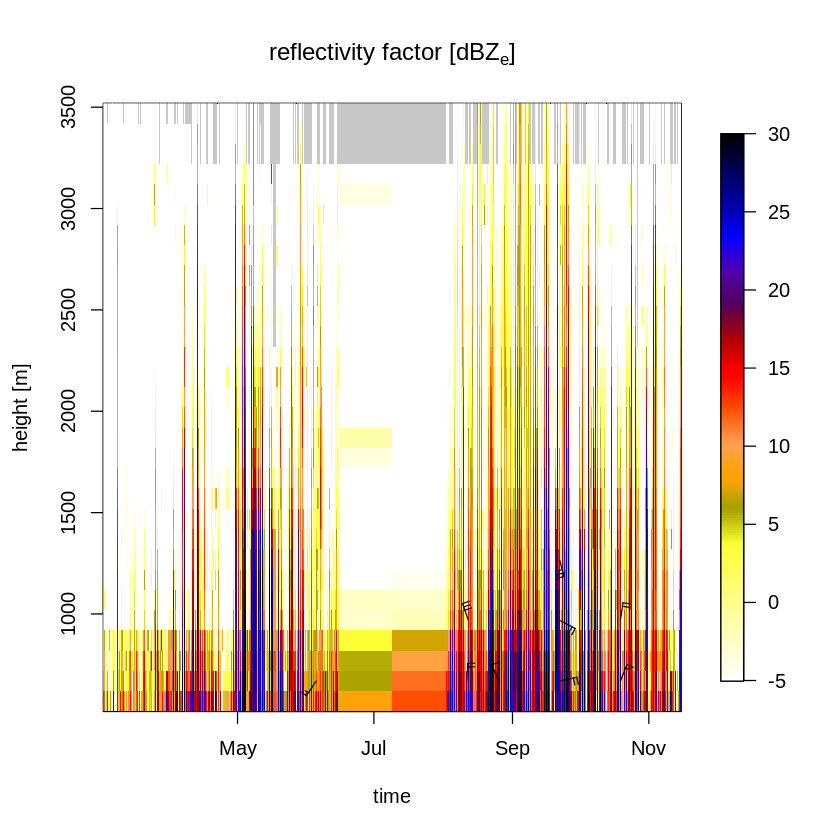

In [11]:
# plot the vertical profile, in terms of reflectivity factor
plot(data_night, quantity = "dbz")

Warning message in plot.vpts(data_night, quantity = "eta"):
“Irregular time-series: missing profiles will not be visible.Use 'regularize_vpts' to make time series regular.”


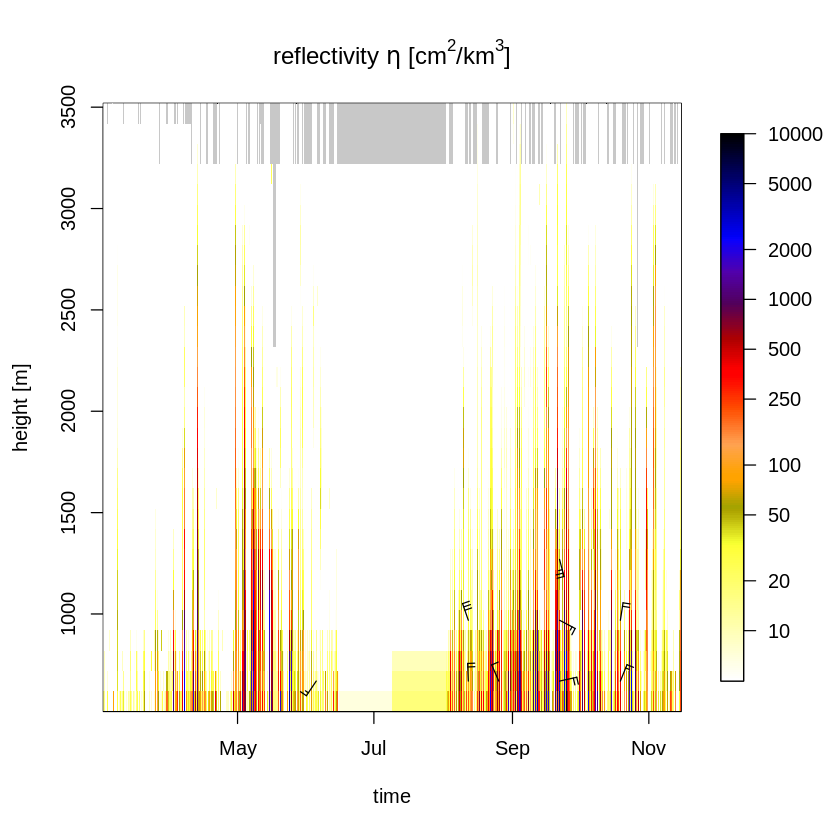

In [12]:
# plot the vertical profile, in terms of (linear) reflectivity
plot(data_night, quantity = "eta")

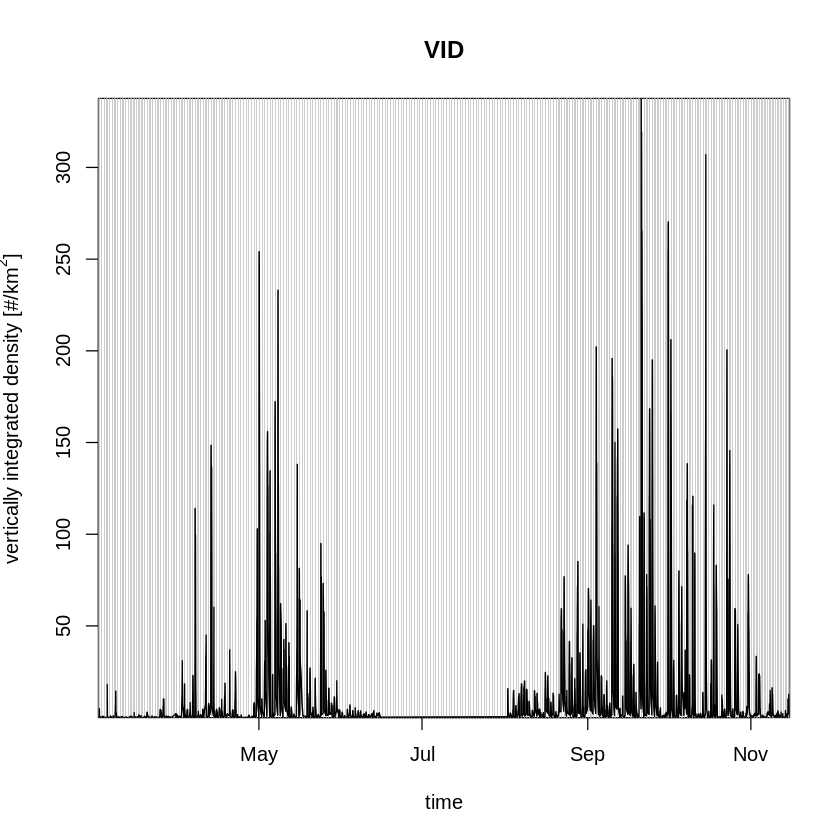

In [19]:
# you can also plot vertically integrated densities (VID):
plot(integrate_profile(data_night), quantity="vid")

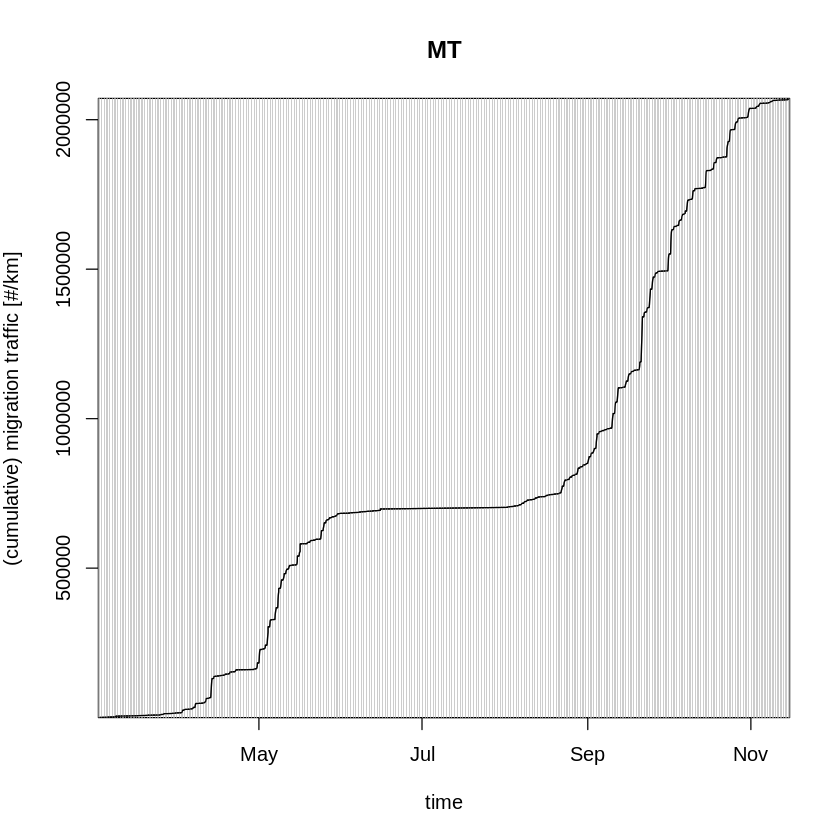

In [20]:
plot(integrate_profile(data_night), quantity="mt") # migration traffic

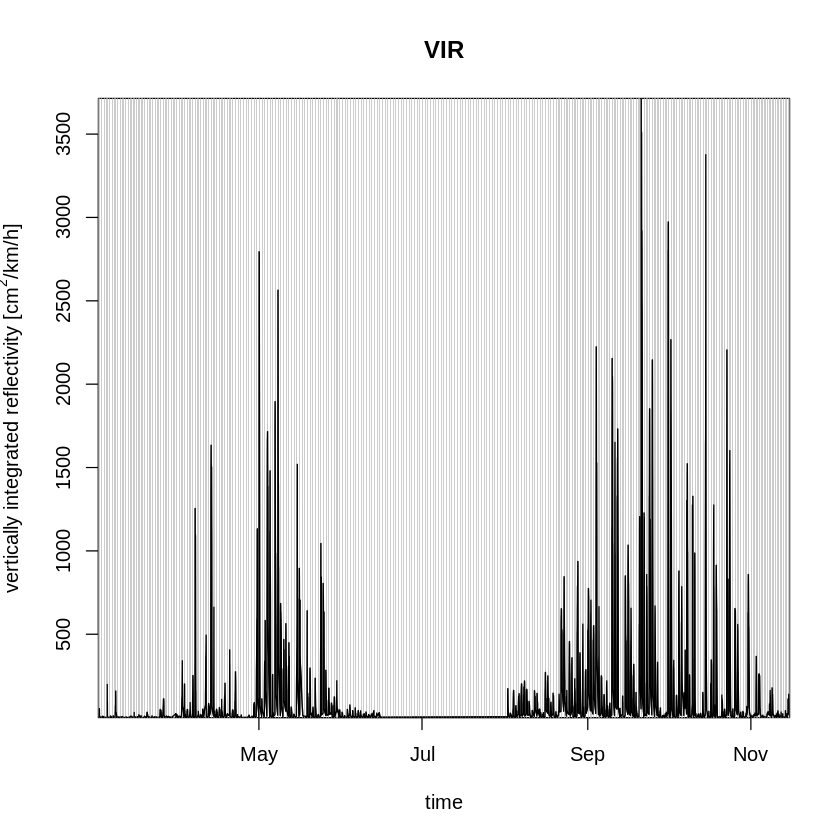

In [21]:
plot(integrate_profile(data_night), quantity="vir") # vertically integrated reflectivity

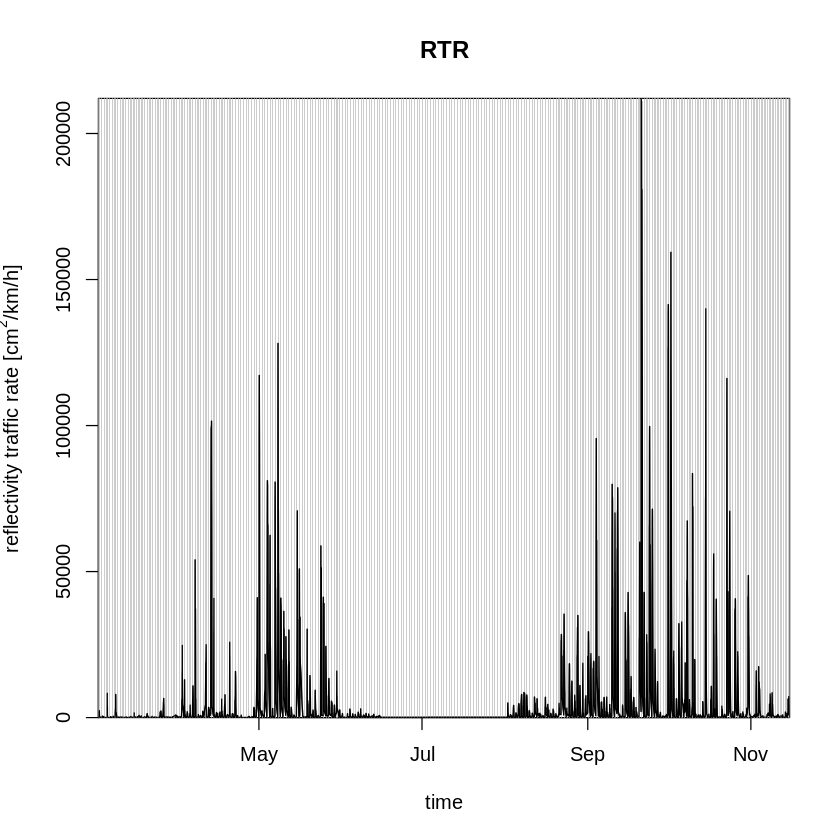

In [22]:
plot(integrate_profile(data_night), quantity="rtr") # reflectivity traffic rate

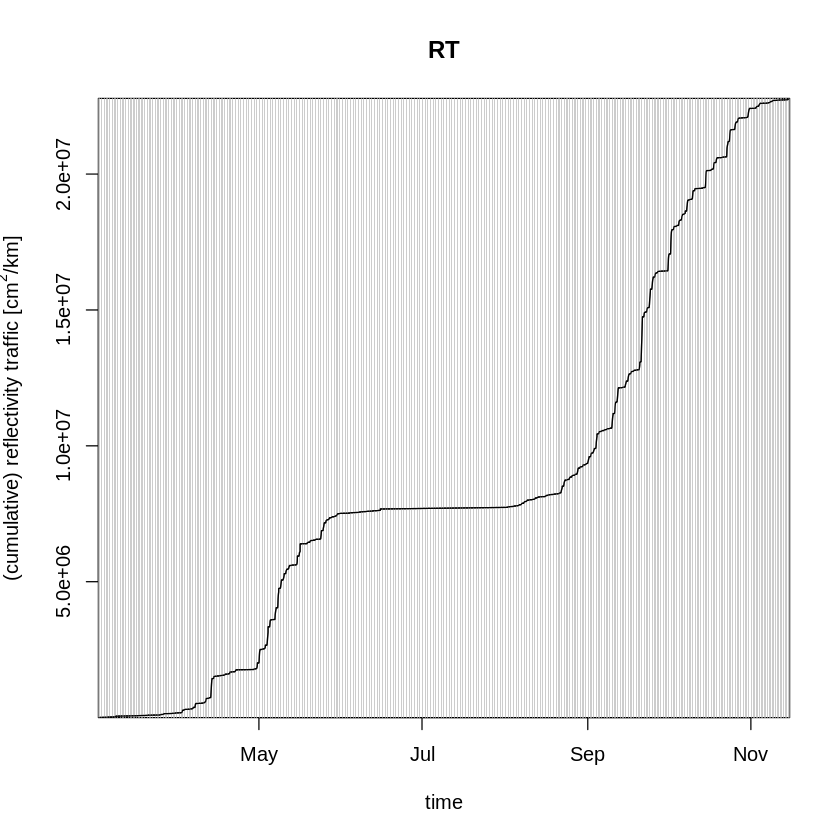

In [23]:
plot(integrate_profile(data_night), quantity="rt") # reflectivity traffic

### Subset down to a few dates

In [13]:
# let's make a subselection of data by date:
date_range = c("2015-10-01","2015-10-03 12:00")
data_filter = filter_vpts(data, min=date_range[1], max=date_range[2])

Warning message in plot.vpts(data_filter):
“Irregular time-series: missing profiles will not be visible.Use 'regularize_vpts' to make time series regular.”


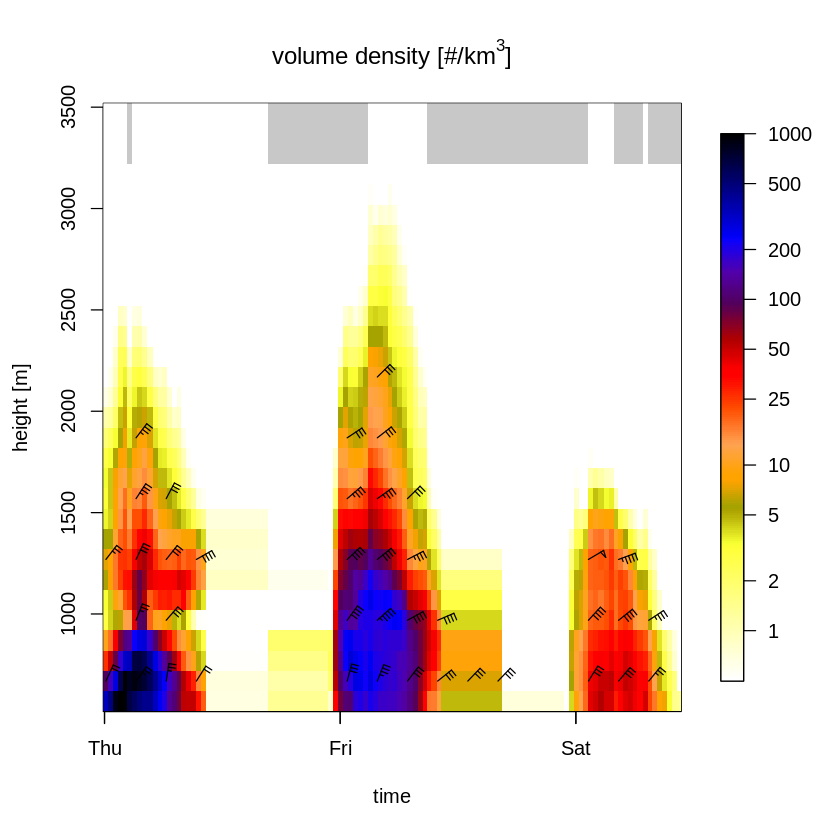

In [14]:
# plot the profiles:
plot(data_filter)

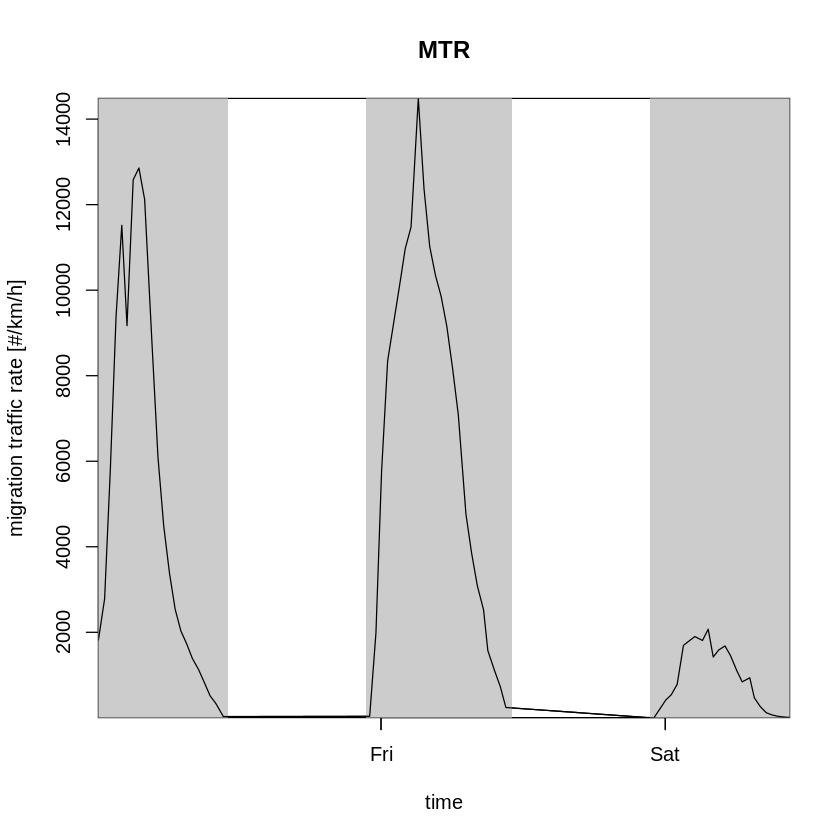

In [15]:
# plot the height-integrated data:
plot(integrate_profile(data_filter))

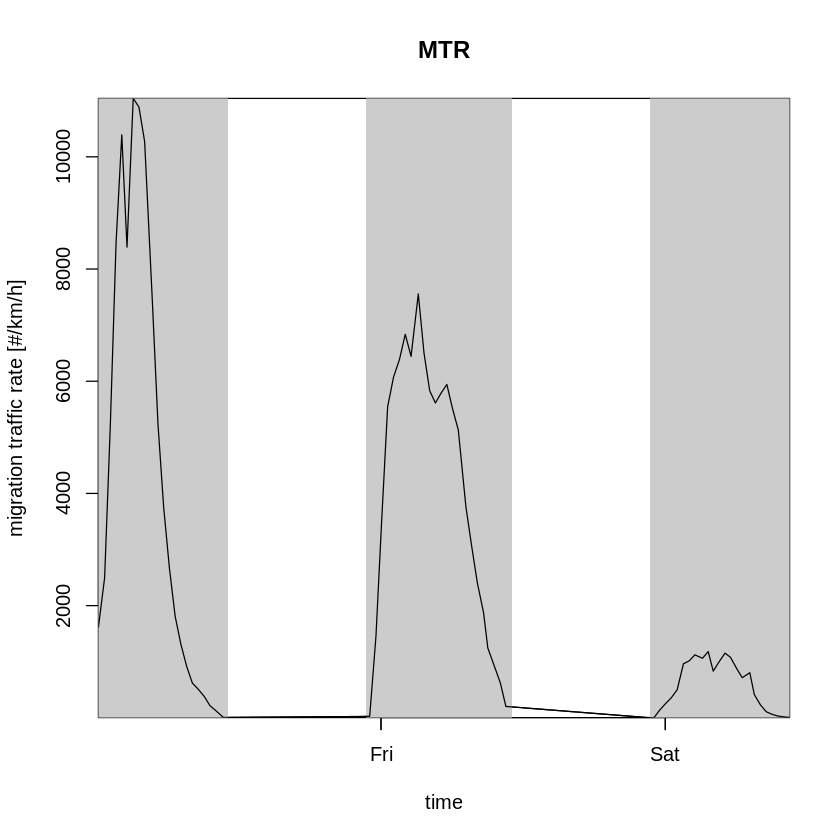

In [16]:
# plot the height-integrated data, only for the 0-1000 meter altitude band:
plot(integrate_profile(data_filter, alt_max=1000))